In [25]:
import pandas as pd
import optuna
import sys
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

sys.path.append('../scripts')
import problem

# Import des données

In [3]:
ROI_train = pd.read_csv("../data/train_rois.csv")
ROI_test = pd.read_csv("../data/test_rois.csv")

In [4]:
participants_train = pd.read_csv("../data/train_participants.csv")

In [5]:
X_train, y_train = problem.get_train_data(True)
X_test, y_test = problem.get_test_data(True)

assert X_train.shape[1] == 284 + 331695

# Séparation des variables en 5 zones : 
- **Zone Corticale** : reflète les principales fonctions cognitives et sensorielles du cerveau.
- **Zone Subcorticale** et Limbique : structures sous-corticales et les régions limbiques, impliquées dans les émotions, la mémoire, et le système de récompense.
- **Zone des Ventricules et des Espaces Liquidiens** : Zones remplies de liquide cérébrospinal (CSF), essentielles pour la protection du cerveau, l'échange de nutriments, et l'élimination des déchets.
- **Zone de la Matière Blanche et Motrice** : Cette catégorie combine la matière blanche, qui facilite la communication entre différentes régions du cerveau, et les structures motrices pour la coordination et le mouvement.
- **Zone Cérébelleuse** : Catégorie distincte pour le cervelet, vu son rôle crucial dans la coordination motrice, mais également dans certaines fonctions cognitives.

In [6]:
corticale_GM = ["lAntIns_GM_Vol", "rAntIns_GM_Vol" ,
"lAntOrbGy_GM_Vol", "rAntOrbGy_GM_Vol" ,
"lFroOpe_GM_Vol", "rFroOpe_GM_Vol" ,
"lFroPo_GM_Vol", "rFroPo_GM_Vol" ,
"lMidFroGy_GM_Vol", "rMidFroGy_GM_Vol" ,
"lMedFroCbr_GM_Vol", "rMedFroCbr_GM_Vol" ,
"lSupMedFroGy_GM_Vol", "rSupMedFroGy_GM_Vol" ,
"lInfFroGy_GM_Vol", "rInfFroGy_GM_Vol" ,
"lInfFroOrbGy_GM_Vol", "rInfFroOrbGy_GM_Vol" ,
"lSupFroGy_GM_Vol", "rSupFroGy_GM_Vol" ,
"lInfFroAngGy_GM_Vol", "rInfFroAngGy_GM_Vol", 
"lAngGy_GM_Vol", "rAngGy_GM_Vol",
"lCun_GM_Vol", "rCun_GM_Vol" ,
"lInfOccGy_GM_Vol", "rInfOccGy_GM_Vol" ,
"lMidOccGy_GM_Vol", "rMidOccGy_GM_Vol" ,
"lOccPo_GM_Vol", "rOccPo_GM_Vol" ,
"lPCu_GM_Vol", "rPCu_GM_Vol" ,
"lParHipGy_GM_Vol", "rParHipGy_GM_Vol" ,
"lParOpe_GM_Vol", "rParOpe_GM_Vol" ,
"lPoCGy_GM_Vol", "rPoCGy_GM_Vol" ,
"lSupParLo_GM_Vol", "rSupParLo_GM_Vol" ,
"lOccFusGy_GM_Vol", "rOccFusGy_GM_Vol" ,
"lPosOrbGy_GM_Vol", "rPosOrbGy_GM_Vol",
"lSupOccGy_GM_Vol", "rSupOccGy_GM_Vol", 
"lEnt_GM_Vol", "rEnt_GM_Vol" ,
"lFusGy_GM_Vol", "rFusGy_GM_Vol" ,
"lInfTemGy_GM_Vol", "rInfTemGy_GM_Vol" ,
"lMidTemGy_GM_Vol", "rMidTemGy_GM_Vol" ,
"lTem_GM_Vol", "rTem_GM_Vol" ,
"lTemPo_GM_Vol", "rTemPo_GM_Vol" ,
"lTemTraGy_GM_Vol", "rTemTraGy_GM_Vol" ,
"lPosIns_GM_Vol", "rPosIns_GM_Vol",
"lPosCinGy_GM_Vol", "rPosCinGy_GM_Vol" ,
"lCenOpe_GM_Vol", "rCenOpe_GM_Vol",
"lCal+Cbr_GM_Vol", "rCal+Cbr_GM_Vol",
"lRecGy_GM_Vol", "rRecGy_GM_Vol" ,
"lLinGy_GM_Vol", "rLinGy_GM_Vol" ,
"lLatOrbGy_GM_Vol", "rLatOrbGy_GM_Vol" ,
"lMidCinGy_GM_Vol", "rMidCinGy_GM_Vol" ,
"lMedOrbGy_GM_Vol", "rMedOrbGy_GM_Vol" ,
"lMedPoCGy_GM_Vol", "rMedPoCGy_GM_Vol" ,
"lMedPrcGy_GM_Vol", "rMedPrcGy_GM_Vol" ,
"lPrcGy_GM_Vol", "rPrcGy_GM_Vol" ,
"lPla_GM_Vol", "rPla_GM_Vol" ,
"lSCA_GM_Vol", "rSCA_GM_Vol" ,
"lSupMarGy_GM_Vol", "rSupMarGy_GM_Vol", 
"lAntCinGy_GM_Vol", "rAntCinGy_GM_Vol", 
"lOC_GM_Vol", "rOC_GM_Vol"

]
corticale_CSF = ["lCenOpe_CSF_Vol", "rCenOpe_CSF_Vol" ,
"lFroOpe_CSF_Vol", "rFroOpe_CSF_Vol" ,
"lFroPo_CSF_Vol", "rFroPo_CSF_Vol",
"lMidFroGy_CSF_Vol", "rMidFroGy_CSF_Vol" ,
"lMedFroCbr_CSF_Vol", "rMedFroCbr_CSF_Vol" ,
"lSupMedFroGy_CSF_Vol", "rSupMedFroGy_CSF_Vol" ,
"lLatOrbGy_CSF_Vol", "rLatOrbGy_CSF_Vol" ,
"lMedOrbGy_CSF_Vol", "rMedOrbGy_CSF_Vol" ,
"lInfFroGy_CSF_Vol", "rInfFroGy_CSF_Vol" ,
"lInfFroOrbGy_CSF_Vol", "rInfFroOrbGy_CSF_Vol" ,
"lPosIns_CSF_Vol", "rPosIns_CSF_Vol" ,
"lSupFroGy_CSF_Vol", "rSupFroGy_CSF_Vol" ,
"lInfFroAngGy_CSF_Vol", "rInfFroAngGy_CSF_Vol" ,
"lPrcGy_CSF_Vol", "rPrcGy_CSF_Vol", 
"lInfOccGy_CSF_Vol", "rInfOccGy_CSF_Vol" ,
"lMidOccGy_CSF_Vol", "rMidOccGy_CSF_Vol" ,
"lOccPo_CSF_Vol", "rOccPo_CSF_Vol" ,
"lOccFusGy_CSF_Vol", "rOccFusGy_CSF_Vol" ,
"lCun_CSF_Vol", "rCun_CSF_Vol" ,
"lPosCinGy_CSF_Vol", "rPosCinGy_CSF_Vol" ,
"lPCu_CSF_Vol", "rPCu_CSF_Vol" ,
"lPoCGy_CSF_Vol", "rPoCGy_CSF_Vol" ,
"lParOpe_CSF_Vol", "rParOpe_CSF_Vol" ,
"lSupParLo_CSF_Vol", "rSupParLo_CSF_Vol" ,
"lSupOccGy_CSF_Vol", "rSupOccGy_CSF_Vol" ,
"lPosOrbGy_CSF_Vol", "rPosOrbGy_CSF_Vol" ,
"lInfTemGy_CSF_Vol", "rInfTemGy_CSF_Vol" ,
"lMidTemGy_CSF_Vol", "rMidTemGy_CSF_Vol" ,
"lEnt_CSF_Vol", "rEnt_CSF_Vol" ,
"lParHipGy_CSF_Vol", "rParHipGy_CSF_Vol" ,
"lTem_CSF_Vol", "rTem_CSF_Vol" ,
"lSupTemGy_CSF_Vol", "rSupTemGy_CSF_Vol" ,
"lTemPo_CSF_Vol", "rTemPo_CSF_Vol" ,
"lTemTraGy_CSF_Vol", "rTemTraGy_CSF_Vol" ,
"lOC_CSF_Vol", "rOC_CSF_Vol" ,
"lAntCinGy_CSF_Vol", "rAntCinGy_CSF_Vol" ,
"lAntIns_CSF_Vol", "rAntIns_CSF_Vol" ,
"lAntOrbGy_CSF_Vol", "rAntOrbGy_CSF_Vol" ,
"lAngGy_CSF_Vol", "rAngGy_CSF_Vol" ,
"lCal+Cbr_CSF_Vol", "rCal+Cbr_CSF_Vol",

]

In [7]:
subcorticale_GM = ["lAcc_GM_Vol", "rAcc_GM_Vol" ,
"lAmy_GM_Vol", "rAmy_GM_Vol" ,
"lBst_GM_Vol", "rBst_GM_Vol" ,
"lCau_GM_Vol", "rCau_GM_Vol" ,
"lPal_GM_Vol", "rPal_GM_Vol" ,
"lPut_GM_Vol", "rPut_GM_Vol" ,
"lThaPro_GM_Vol", "rThaPro_GM_Vol", 
"lBasCbr+FobBr_GM_Vol", "rBasCbr+FobBr_GM_Vol"]
subcorticale_CSF = ["lAcc_CSF_Vol", "rAcc_CSF_Vol" ,
"lAmy_CSF_Vol", "rAmy_CSF_Vol" ,
"lBst_CSF_Vol", "rBst_CSF_Vol" ,
"lCau_CSF_Vol", "rCau_CSF_Vol" ,
"lPal_CSF_Vol", "rPal_CSF_Vol" ,
"lPut_CSF_Vol", "rPut_CSF_Vol" ,
"lThaPro_CSF_Vol", "rThaPro_CSF_Vol" ,
"lLinGy_CSF_Vol", "rLinGy_CSF_Vol" ,
"lMidCinGy_CSF_Vol", "rMidCinGy_CSF_Vol" ,
"lMedPoCGy_CSF_Vol", "rMedPoCGy_CSF_Vol" ,
"lMedPrcGy_CSF_Vol", "rMedPrcGy_CSF_Vol" ,
"lFusGy_CSF_Vol", "rFusGy_CSF_Vol" ,
"lRecGy_CSF_Vol", "rRecGy_CSF_Vol", 
"lBasCbr+FobBr_CSF_Vol", "rBasCbr+FobBr_CSF_Vol", 
"lPla_CSF_Vol", "rPla_CSF_Vol", 
"lSCA_CSF_Vol", "rSCA_CSF_Vol", 
"lCbr+Mot_CSF_Vol", "rCbr+Mot_CSF_Vol", 
"lSupMarGy_CSF_Vol", "rSupMarGy_CSF_Vol" ]

In [8]:
liquidiens_GM = ["l3thVen_GM_Vol", "r3thVen_GM_Vol" ,
"l4thVen_GM_Vol", "r4thVen_GM_Vol" ,
"lInfLatVen_GM_Vol", "rInfLatVen_GM_Vol" ,
"lLatVen_GM_Vol", "rLatVen_GM_Vol" ,
"lVenVen_GM_Vol", "rVenVen_GM_Vol" ,
]
liquidiens_CSF = ["l3thVen_CSF_Vol", "r3thVen_CSF_Vol" ,
"l4thVen_CSF_Vol", "r4thVen_CSF_Vol" ,
"lCSF_CSF_Vol", "rCSF_CSF_Vol" ,
"lInfLatVen_CSF_Vol", "rInfLatVen_CSF_Vol" ,
"lLatVen_CSF_Vol", "rLatVen_CSF_Vol" ,
"lVenVen_CSF_Vol", "rVenVen_CSF_Vol"]

In [9]:
mat_blanche_GM = ["lCbr+Mot_GM_Vol", 
                  "rCbr+Mot_GM_Vol",]
mat_blanche_CSF = ["lCbeWM_CSF_Vol", "rCbeWM_CSF_Vol" ,
"lCbrWM_CSF_Vol", "rCbrWM_CSF_Vol"]

In [10]:
cereb_GM = ["lExtCbe_GM_Vol", "rExtCbe_GM_Vol" ,
"lCbeWM_GM_Vol", "rCbeWM_GM_Vol" ,
"lCbeLoCbe1-5_GM_Vol", "rCbeLoCbe1-5_GM_Vol" ,
"lCbeLoCbe6-7_GM_Vol", "rCbeLoCbe6-7_GM_Vol" ,
"lCbeLoCbe8-10_GM_Vol", "rCbeLoCbe8-10_GM_Vol" , 
]
cereb_CSF = ["lExtCbe_CSF_Vol", "rExtCbe_CSF_Vol", 
"lCbeLoCbe1-5_CSF_Vol", "rCbeLoCbe1-5_CSF_Vol",
"lCbeLoCbe6-7_CSF_Vol", "rCbeLoCbe6-7_CSF_Vol",
"lCbeLoCbe8-10_CSF_Vol", "rCbeLoCbe8-10_CSF_Vol",
]

In [11]:
autre_GM = ['lCbrWM_GM_Vol',
 'rCbrWM_GM_Vol',
 'lCSF_GM_Vol',
 'rCSF_GM_Vol',
 'lHip_GM_Vol',
 'rHip_GM_Vol',
 'lSupTemGy_GM_Vol',
 'rSupTemGy_GM_Vol',
]
autre_CSF = [ 'lHip_CSF_Vol',
 'rHip_CSF_Vol']

In [12]:
assert len(corticale_GM) + len(corticale_CSF) + len(subcorticale_CSF) + len(subcorticale_GM) + len(liquidiens_GM) + len(liquidiens_CSF) + len(mat_blanche_GM) + len(mat_blanche_CSF) + len(cereb_GM) + len(cereb_CSF) + len(autre_CSF) + len(autre_GM) == ROI_train.shape[1]-4

# Calcul des volumes de chaque partie

In [13]:
ROI_train["Vol_GM_corticale"] = ROI_train[corticale_GM].sum(axis = 1)
ROI_train["Vol_CSF_corticale"] = ROI_train[corticale_CSF].sum(axis = 1)

In [14]:
ROI_train["Vol_GM_subcorticale"] = ROI_train[subcorticale_GM].sum(axis = 1)
ROI_train["Vol_CSF_subcorticale"] = ROI_train[subcorticale_CSF].sum(axis = 1)

In [15]:
ROI_train["Vol_GM_liquidien"] = ROI_train[liquidiens_GM].sum(axis = 1)
ROI_train["Vol_CSF_liquidien"] = ROI_train[liquidiens_CSF].sum(axis = 1)

In [16]:
ROI_train["Vol_GM_matblanche"] = ROI_train[mat_blanche_GM].sum(axis = 1)
ROI_train["Vol_CSF_matblanche"] = ROI_train[mat_blanche_CSF].sum(axis = 1)

In [17]:
ROI_train["Vol_GM_cereb"] = ROI_train[cereb_GM].sum(axis = 1)
ROI_train["Vol_CSF_cereb"] = ROI_train[cereb_CSF].sum(axis = 1)

In [18]:
ROI_train["Vol_GM_autre"] = ROI_train[autre_GM].sum(axis = 1)
ROI_train["Vol_CSF_autre"] = ROI_train[autre_CSF].sum(axis = 1)

In [19]:
ROI_test["Vol_GM_corticale"] = ROI_test[corticale_GM].sum(axis=1)
ROI_test["Vol_CSF_corticale"] = ROI_test[corticale_CSF].sum(axis=1)
ROI_test["Vol_GM_subcorticale"] = ROI_test[subcorticale_GM].sum(axis=1)
ROI_test["Vol_CSF_subcorticale"] = ROI_test[subcorticale_CSF].sum(axis=1)
ROI_test["Vol_GM_liquidien"] = ROI_test[liquidiens_GM].sum(axis=1)
ROI_test["Vol_CSF_liquidien"] = ROI_test[liquidiens_CSF].sum(axis=1)
ROI_test["Vol_GM_matblanche"] = ROI_test[mat_blanche_GM].sum(axis=1)
ROI_test["Vol_CSF_matblanche"] = ROI_test[mat_blanche_CSF].sum(axis=1)
ROI_test["Vol_GM_cereb"] = ROI_test[cereb_GM].sum(axis=1)
ROI_test["Vol_CSF_cereb"] = ROI_test[cereb_CSF].sum(axis=1)
ROI_test["Vol_GM_autre"] = ROI_test[autre_GM].sum(axis=1)
ROI_test["Vol_CSF_autre"] = ROI_test[autre_CSF].sum(axis=1)

In [20]:
Vol_list = ["Vol_GM_corticale", "Vol_CSF_corticale", "Vol_GM_subcorticale", "Vol_CSF_subcorticale", "Vol_GM_liquidien","Vol_CSF_liquidien", "Vol_GM_matblanche","Vol_CSF_matblanche", "Vol_GM_cereb", "Vol_CSF_cereb" , "Vol_GM_autre", "Vol_CSF_autre"]

# ACP et corrélation des volumes des parties

In [188]:
pca_rois = PCA(n_components=2)
PCs_rois = pca_rois.fit_transform(ROI_train)
print(pca_rois.explained_variance_ratio_)

[0.77138699 0.19514344]


In [189]:
df = pd.DataFrame(dict(age=participants_train['age'], PC1_ROIs=PCs_rois[:, 0], PC2_ROIs=PCs_rois[:, 1]))
df[Vol_list] = ROI_train[Vol_list]

## Cercles des corrélations

In [190]:
features = ["Vol_GM_corticale", "Vol_CSF_corticale", "Vol_GM_subcorticale", "Vol_CSF_subcorticale", "Vol_GM_liquidien","Vol_CSF_liquidien", "Vol_GM_matblanche","Vol_CSF_matblanche", "Vol_GM_cereb", "Vol_CSF_cereb" , "Vol_GM_autre", "Vol_CSF_autre", "age"]

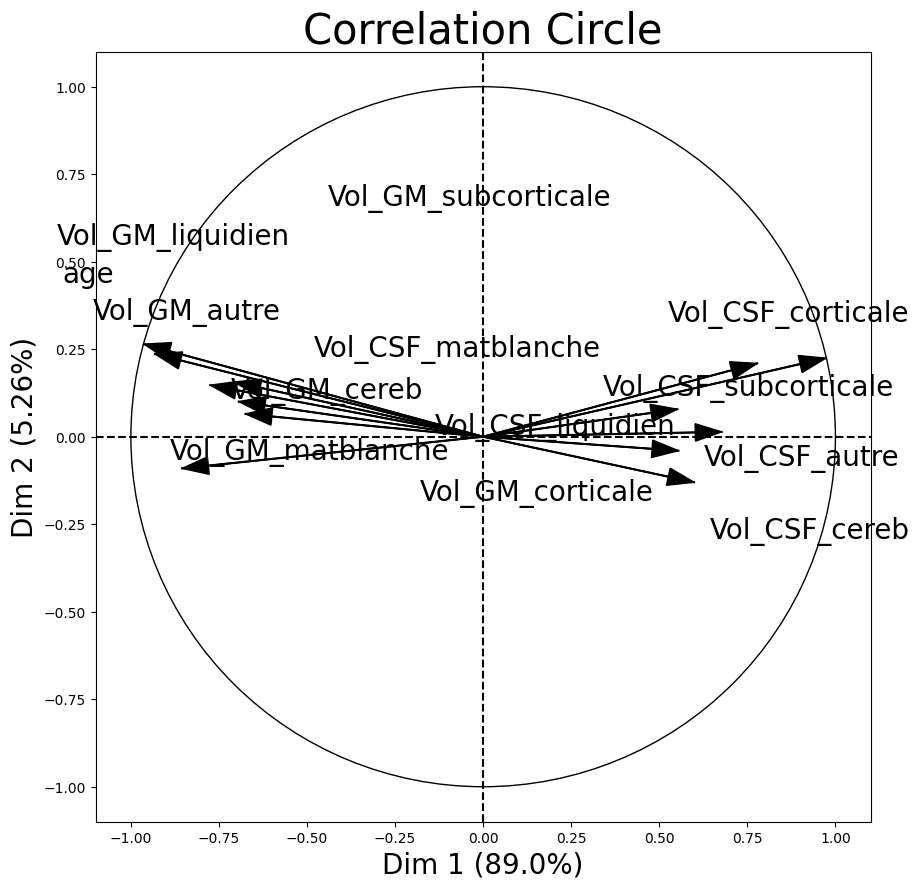

In [191]:
figure, correlation_matrix = plot_pca_correlation_graph(df.drop(columns=["PC1_ROIs", "PC2_ROIs"]), 
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

AttributeError: 'PathCollection' object has no attribute 'plot'

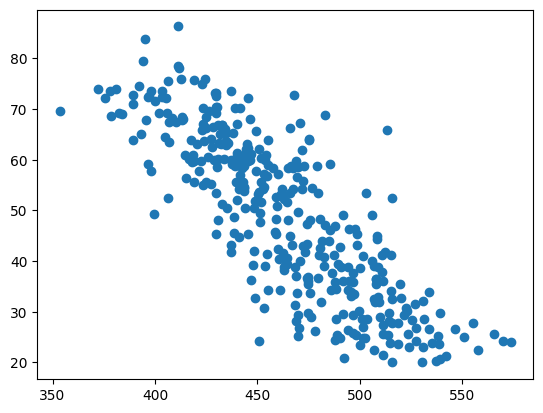

In [215]:
for element in ["Vol_GM_corticale", "Vol_CSF_corticale", "Vol_GM_subcorticale", "Vol_CSF_subcorticale", "Vol_GM_liquidien","Vol_CSF_liquidien", "Vol_GM_matblanche","Vol_CSF_matblanche", "Vol_GM_cereb", "Vol_CSF_cereb" , "Vol_GM_autre", "Vol_CSF_autre", "age"] :
    fig = plt.scatter(x = df[element], y = df['age'])
    fig.plot()

# Modélisation

In [40]:
def objective(trial):
    params = {
              'max_depth': trial.suggest_int('max_depth',4, 20),
              'subsample': trial.suggest_float('subsample', 0.6, 1.0, log = True),
              'n_estimators': trial.suggest_int('n_estimators', 90, 150),
              'alpha': trial.suggest_float('alpha', 0.05, 1.0, log= True)}

    model = GradientBoostingRegressor(**params)
    model.fit(ROI_train, y_train)
    y_pred = model.predict(ROI_test)
    
    rmse = root_mean_squared_error(y_test, y_pred)
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

print(f"Best parameters: {study.best_params}")
print(f"Best RMSE score: {study.best_value}")

[I 2024-02-12 09:20:39,499] A new study created in memory with name: no-name-4fc77506-81d4-4a0d-9e6c-bc2f4ab329e0
[I 2024-02-12 09:20:44,152] Trial 0 finished with value: 7.389818012001694 and parameters: {'max_depth': 6, 'subsample': 0.6859567195782482, 'n_estimators': 122, 'alpha': 0.3549109906317153}. Best is trial 0 with value: 7.389818012001694.
[I 2024-02-12 09:20:50,028] Trial 1 finished with value: 7.5555095974968545 and parameters: {'max_depth': 5, 'subsample': 0.8855294319457659, 'n_estimators': 137, 'alpha': 0.4168525070454338}. Best is trial 0 with value: 7.389818012001694.
[I 2024-02-12 09:20:56,963] Trial 2 finished with value: 8.17429067092258 and parameters: {'max_depth': 10, 'subsample': 0.9619614217229816, 'n_estimators': 97, 'alpha': 0.051324276050604654}. Best is trial 0 with value: 7.389818012001694.
[I 2024-02-12 09:21:03,898] Trial 3 finished with value: 9.215949239093113 and parameters: {'max_depth': 19, 'subsample': 0.9768495113819574, 'n_estimators': 90, 'alph

In [21]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(ROI_train, y_train)

y_pred = model.predict(ROI_test)
root_mean_squared_error(y_test, y_pred)

7.845682841367494

In [27]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [500, 750, 1000],  # Nombre d'arbres
    'max_depth': [10, 20, 30],         # Profondeur maximale des arbres
    'min_samples_split': [2, 8, 12]   # Nombre minimal de samples requis pour spliter un noeud
}

# Configurer la recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Lancer la recherche sur l'ensemble d'entraînement
grid_search.fit(ROI_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score de validation croisée
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score de validation croisée: ", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Meilleurs paramètres:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 750}
Meilleur score de validation croisée:  0.7353897982351727


In [28]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(ROI_test)

rmse_test = root_mean_squared_error(y_test, predictions)
print("Score RMSE sur l'ensemble de test: ", rmse_test)

Score RMSE sur l'ensemble de test:  7.718010043683259
